# 1_IDA_Exam_EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data

In [2]:
df= pd.read_csv('einkommen.train', sep=",", na_values = " ?", header=None)

columns = ["Age", "Employment_type", "Interview_dependent_weight", "Education_level", "Schooling/training_period", "Marital_Status", "Employment_area", "Partnership", "Ethnicity", "Gender", "Gains", "Losses", "Weekly_working_time", "Country", "Income"]
df.columns = columns

# Split Data zwischen df_5000 ( mit Income Label) u. df_25000(ohne Income Label)

In [3]:
key = df["Income"].isnull()  #https://stackoverflow.com/questions/36525020/how-to-filter-na-values-and-add-it-to-a-new-dataframe
df_25000 = df.loc[key]
df_5000 = df.loc[~key] # not na value

# EDA Generel

In [4]:
df.head()

,Age,Employment_type,Interview_dependent_weight,Education_level,Schooling/training_period,Marital_Status,Employment_area,Partnership,Ethnicity,Gender,Gains,Losses,Weekly_working_time,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.tail()

,Age,Employment_type,Interview_dependent_weight,Education_level,Schooling/training_period,Marital_Status,Employment_area,Partnership,Ethnicity,Gender,Gains,Losses,Weekly_working_time,Country,Income
29995,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,NaN
29996,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,NaN
29997,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,NaN
29998,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,NaN
29999,36,Private,348960,HS-grad,9,Never-married,Tech-support,Not-in-family,White,Male,0,0,50,United-States,NaN


In [6]:
df.shape 

(30000, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         30000 non-null  int64 
 1   Employment_type             28323 non-null  object
 2   Interview_dependent_weight  30000 non-null  int64 
 3   Education_level             30000 non-null  object
 4   Schooling/training_period   30000 non-null  int64 
 5   Marital_Status              30000 non-null  object
 6   Employment_area             28318 non-null  object
 7   Partnership                 30000 non-null  object
 8   Ethnicity                   30000 non-null  object
 9   Gender                      30000 non-null  object
 10  Gains                       30000 non-null  int64 
 11  Losses                      30000 non-null  int64 
 12  Weekly_working_time         30000 non-null  int64 
 13  Country                     29461 non-null  ob

- 30000 Samples mit 15 Features
- 6 Numerische Features
- 9 Diskrete Features(non Numeric)
- NA sind in den Features:  Employment type, Employment area, Country und Income vorhanden (alles Non Numeric Features)

In [8]:
df.isnull().sum() 

Age                               0
Employment_type                1677
Interview_dependent_weight        0
Education_level                   0
Schooling/training_period         0
Marital_Status                    0
Employment_area                1682
Partnership                       0
Ethnicity                         0
Gender                            0
Gains                             0
Losses                            0
Weekly_working_time               0
Country                         539
Income                        25000
dtype: int64

Überprüfung der Missing Values:

- Employment type hat 1677 Zeilen wo ein Missing value Vorhanden ist
- Employment area hat 1682 Zeilen wo ein Missing value Vorhanden ist
- Country hat 539 Zeilen wo ein Missing value Vorhanden ist
- Income hat 25000 Zeilen wo ein Missing value Vorhanden ist

In [9]:
df[df.isna().any(axis=1)] 

,Age,Employment_type,Interview_dependent_weight,Education_level,Schooling/training_period,Marital_Status,Employment_area,Partnership,Ethnicity,Gender,Gains,Losses,Weekly_working_time,Country,Income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,30,Private,55481,Masters,14,Never-married,Tech-support,Unmarried,White,Male,0,0,45,Nicaragua,NaN
29996,48,Private,119471,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,0,0,56,Philippines,NaN
29997,61,Local-gov,167347,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,United-States,NaN
29998,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,NaN


Überprüfung: Wie viele Samples gibt es, die mindestens ein NA haben:
- zusammen sind es 25420  samples mit mindestens einen Missing Value

# EDA für alle Numerischen Features/Spalten

<AxesSubplot:>

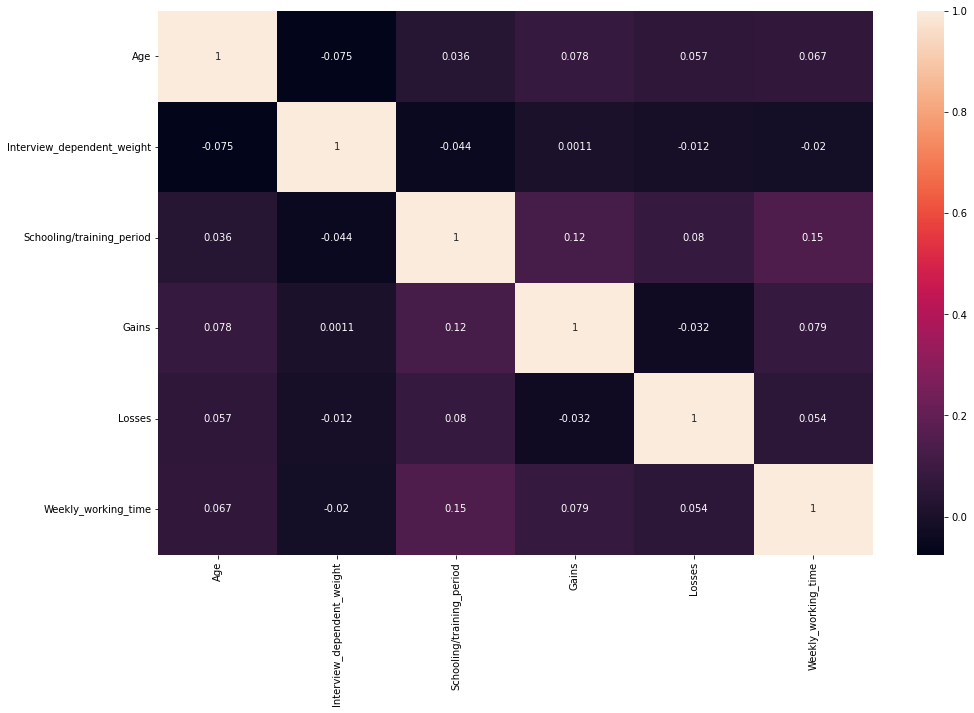

In [10]:
# calculate the correlation matrix
fig = plt.figure(figsize=(16,10))
corr = df.corr() 
# plot the heatmap
sns.heatmap(corr,annot=True,xticklabels=corr.columns,yticklabels=corr.columns)

Basierend auf diesen Korrelations plot, gibt es eine maximale korrelation zwischen Weekly working time und Schooling/Trainings. Aber es ist ein sehr kleine Korrelation. Man erkennt das allgemein kaum korrelation  zwischen den Features vorhanden ist. 

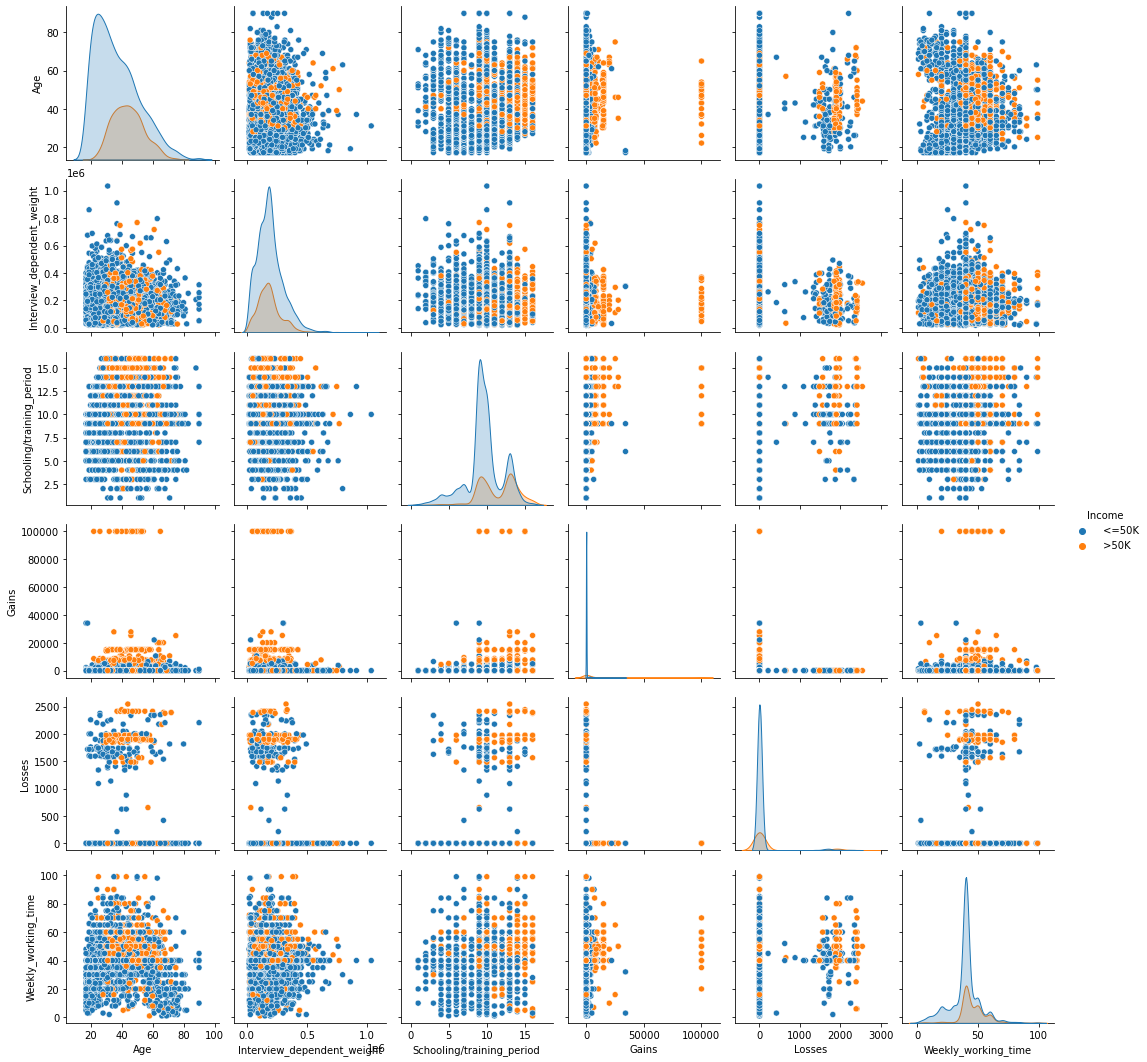

In [11]:
sns.pairplot(df,hue="Income")

Die Beziehung zwischen verschieden Features unterteilt in den beiden Income Gruppen 
- bei Gain gibt es eine Seperation aber nicht so stark (die einen hohen Gain haben verdienen mehr als 50K)
- allgemein kaum eine Seperation zu sehen

# EDA für alle Features wo Missing values vorhanden sind

# Employment Type (Beschäftigungsverhältnis)

 Private             20901
 Self-emp-not-inc     2363
 Local-gov            1928
 State-gov            1189
 Self-emp-inc         1037
 Federal-gov           887
 Without-pay            13
 Never-worked            5
Name: Employment_type, dtype: int64


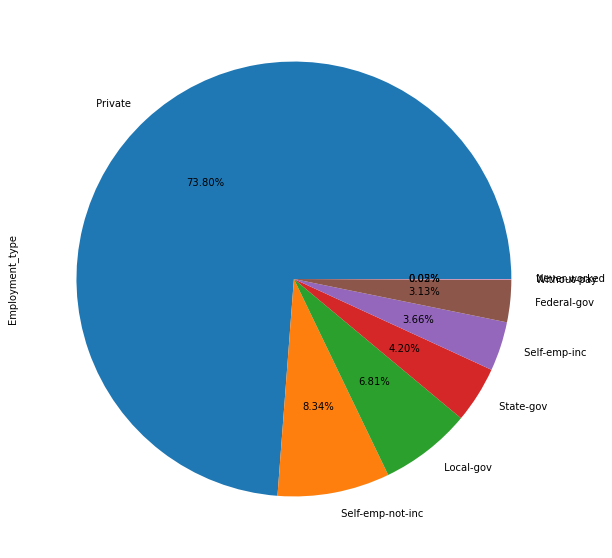

In [12]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["Employment_type"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["Employment_type"].value_counts()) #meisten Leute sind  Privat

<AxesSubplot:xlabel='count', ylabel='Employment_type'>

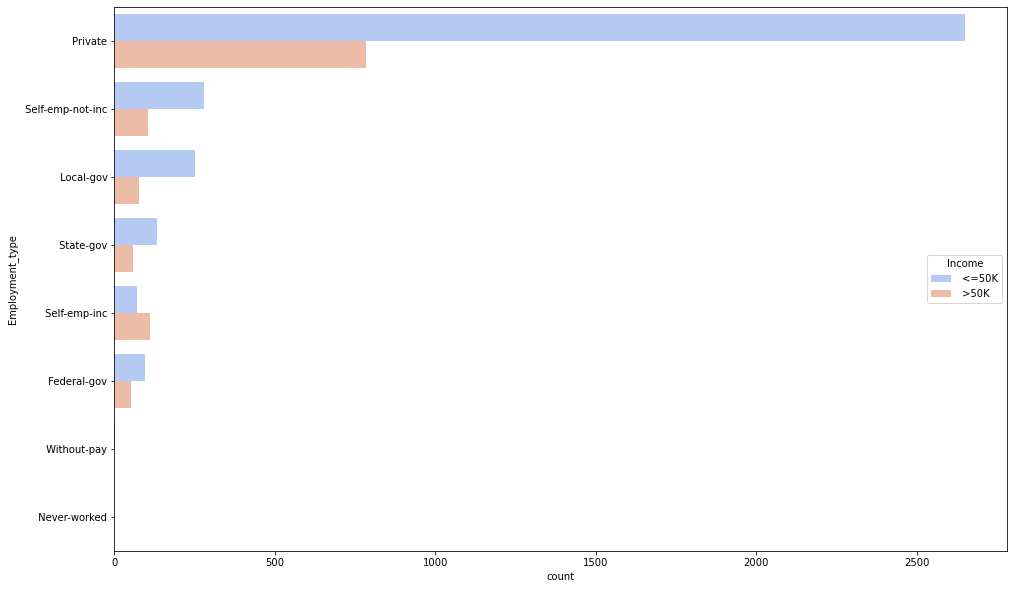

In [13]:
#plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(16,10))
sns.countplot(y="Employment_type", data=df, hue="Income",palette="coolwarm",
              order=df.Employment_type.value_counts().iloc[:].index)

Mehr als 70% von allem samples sind Privat, also am häufigsten vorhanden 
- selbst , wenn man es zwischen den Income unterteilt ist es die selbe Countordnung

#  Employment Area (Beschäftigungsbereich)

 Prof-specialty       3802
 Craft-repair         3784
 Exec-managerial      3736
 Adm-clerical         3507
 Sales                3370
 Other-service        3044
 Machine-op-inspct    1846
 Transport-moving     1473
 Handlers-cleaners    1252
 Farming-fishing       913
 Tech-support          856
 Protective-serv       583
 Priv-house-serv       144
 Armed-Forces            8
Name: Employment_area, dtype: int64


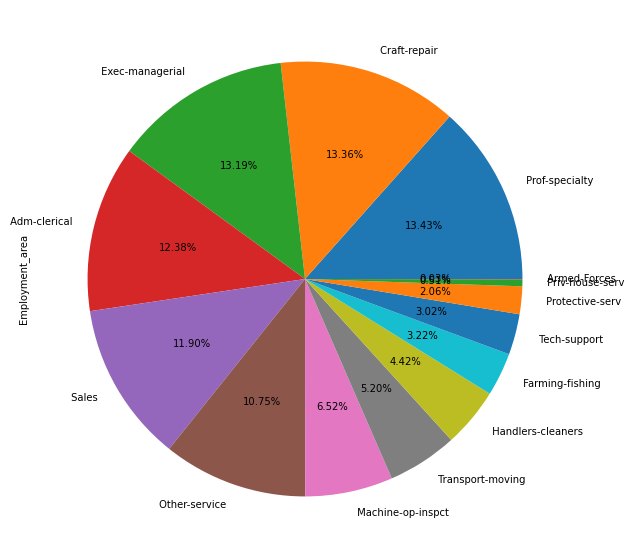

In [14]:
#plt.rcParams['font.size'] = 13
fig = plt.figure(figsize=(16,10))
df["Employment_area"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["Employment_area"].value_counts())

<AxesSubplot:xlabel='count', ylabel='Employment_area'>

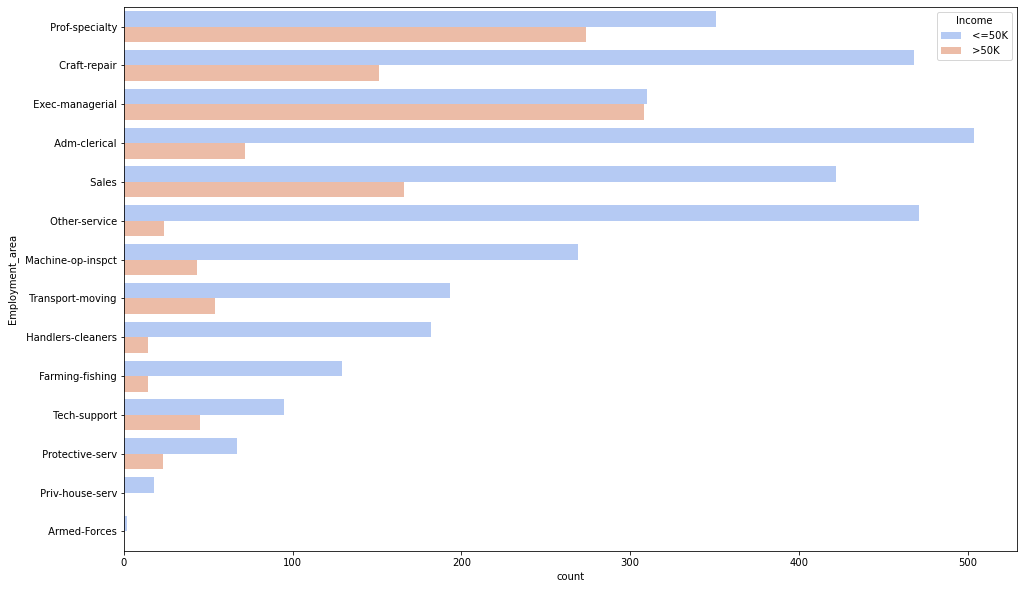

In [15]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="Employment_area",hue="Income", data=df, palette="coolwarm",
              order=df.Employment_area.value_counts().iloc[:].index)

Hier ist es mehr ausgeglichen verteilt
- Prof-speciality, craft repair und Exec-managerial sind die, die am häufigsten vertreten sind
- Am geringsten ist Armed-Forces vorhanden
- Exec managerial hat fast soviele Samples die mehr oder weniger als 50k verdienen

# Country

 United-States                 26871
 Mexico                          602
 Philippines                     177
 Germany                         122
 Canada                          115
 Puerto-Rico                     112
 El-Salvador                      96
 India                            94
 England                          87
 Cuba                             87
 South                            76
 Jamaica                          73
 China                            68
 Vietnam                          62
 Italy                            62
 Dominican-Republic               62
 Guatemala                        60
 Japan                            56
 Poland                           56
 Columbia                         55
 Taiwan                           48
 Haiti                            40
 Iran                             40
 Portugal                         33
 Nicaragua                        32
 Peru                             28
 Greece                           28
 

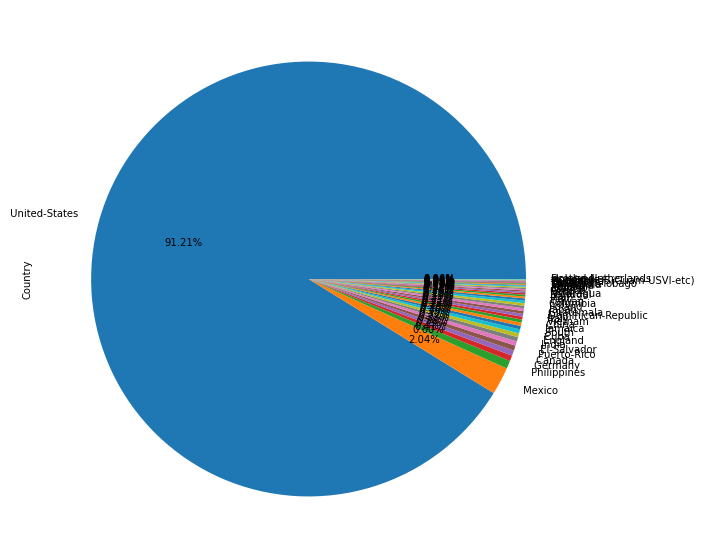

In [16]:
fig = plt.figure(figsize=(16,10))
df["Country"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["Country"].value_counts())

Man sieht das mehr als 90 % aus Amerika stammen und der rest wie Mexiko sehr wenig vorhanden mit 2 % absteigend runter
- So kann man erkennen, dass es ein Inbalanced Feature ist (habe dieses Feature komplett gelöscht anstatt die NA zu füllen)

# Restliche Spalten /Features ohne Missing Values

# Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

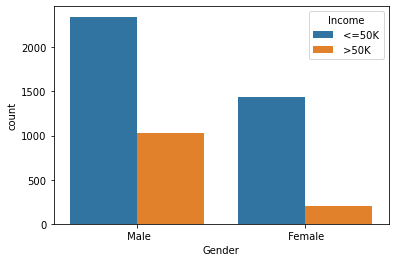

In [17]:
sns.countplot(x="Gender",hue="Income",data=df)

Hier sieht man die Verteilung des Geschlechts:
- Männer sind doppelt so oft vorhanden als Frauen
- Männer verdienen beim Gehalt mehr als Frauen
- fast die hälfte der Männer ist der income größer als 50 k
- aber nur 10% der Frauen verdienen mehr als 50 k

# Age

<AxesSubplot:xlabel='Age', ylabel='count'>

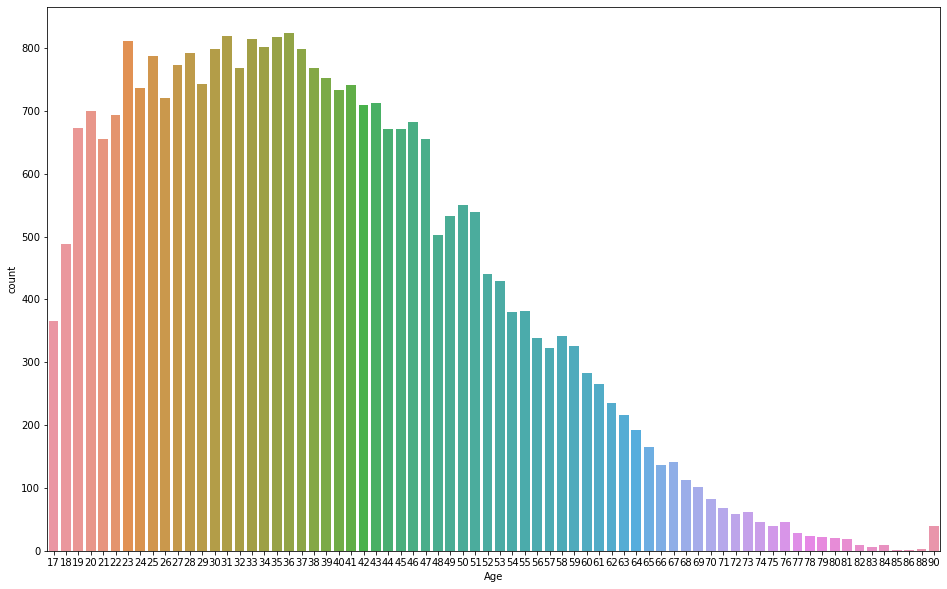

In [18]:
fig = plt.figure(figsize=(16,10))
sns.countplot(x="Age",data=df)
#stark vertretten zwischen 23-50

<AxesSubplot:xlabel='Age', ylabel='Income'>

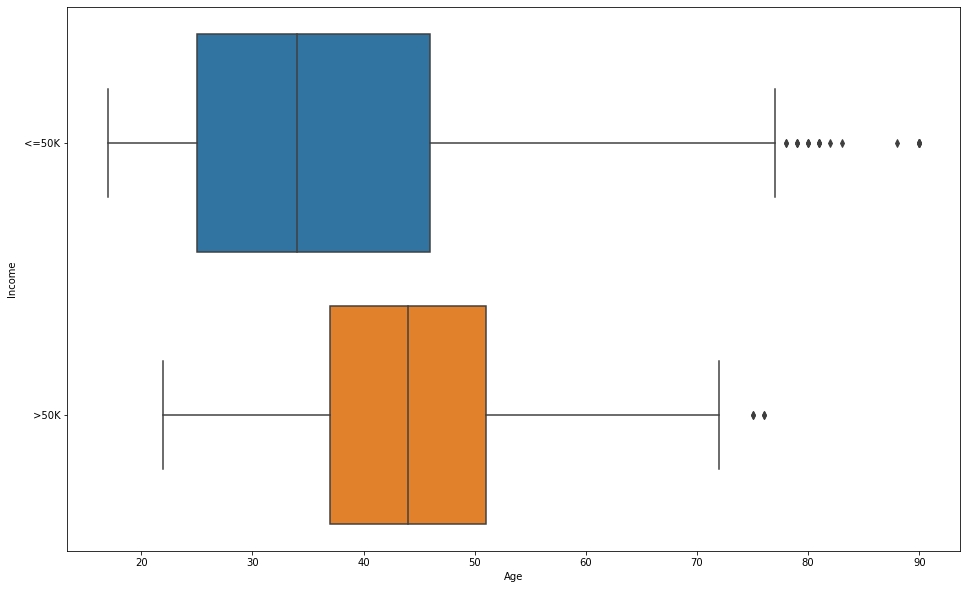

In [19]:
fig = plt.figure(figsize=(16,10))
sns.boxplot(data=df,x="Age",y="Income")

- Stark vertreten zwischen 23-50
- Median des Alters ist höher bei Leuten die mehr verdienen
- Je älter desto wahrscheinlicher ist es das man mehr verdient (wegen der Erfahrung)

# Interview Dependent (Gewichtungsfaktor zum Ausgleichen des Umfrage-bedingten Auswahl-Bias)

<AxesSubplot:xlabel='Interview_dependent_weight', ylabel='Income'>

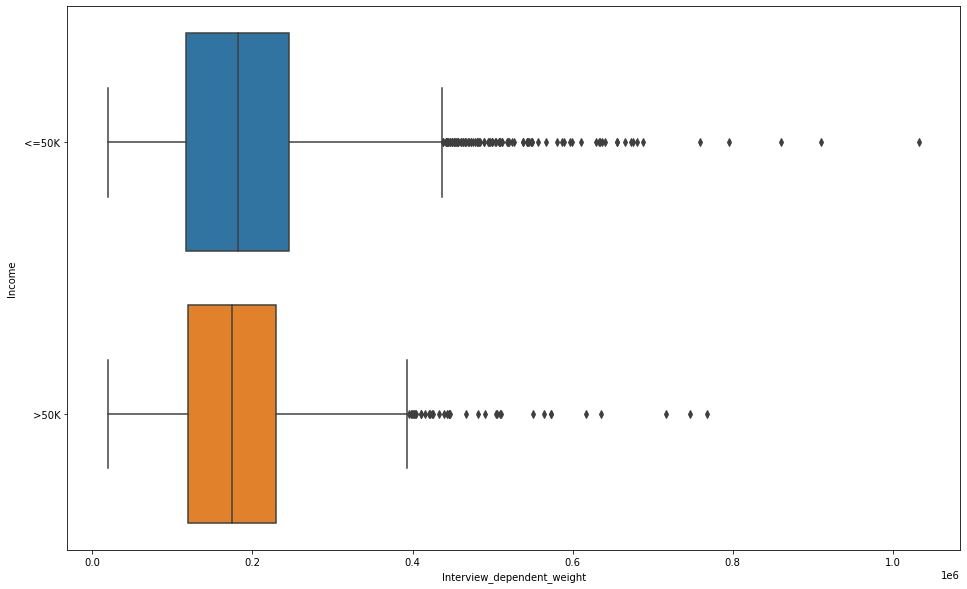

In [20]:
fig = plt.figure(figsize=(16,10))
sns.boxplot(data=df,x="Interview_dependent_weight",y="Income")

Median bzw. die Quantile von den Interview independent  sind fast gleich für beide Income-Gruppen

# Education Level

<AxesSubplot:xlabel='count', ylabel='Education_level'>

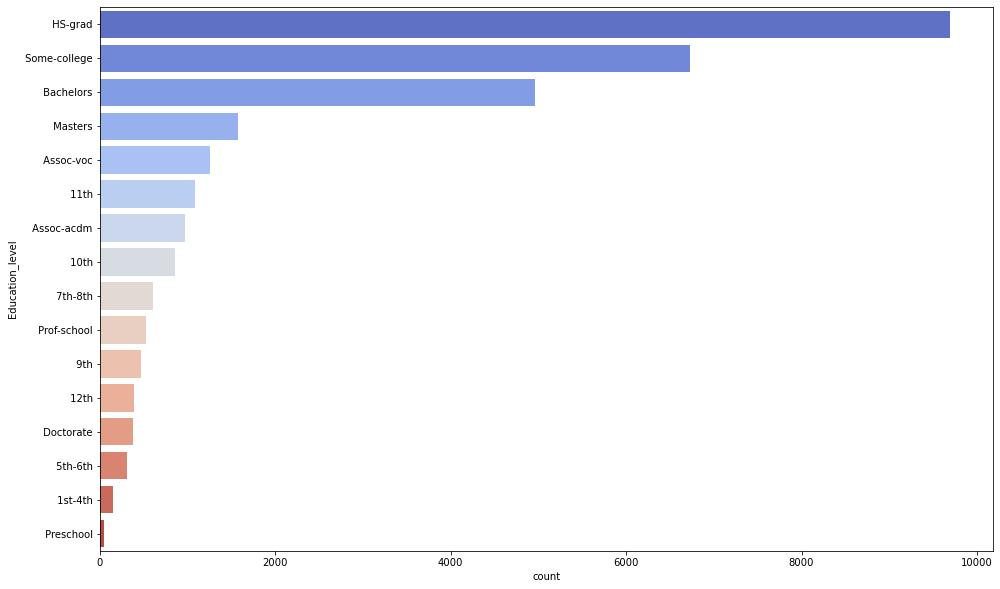

In [21]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="Education_level", data=df, palette="coolwarm",
              order=df.Education_level.value_counts().iloc[:].index)
#größtenteils HS grad folloed by ihrgentein College und eienn BA

<AxesSubplot:xlabel='count', ylabel='Education_level'>

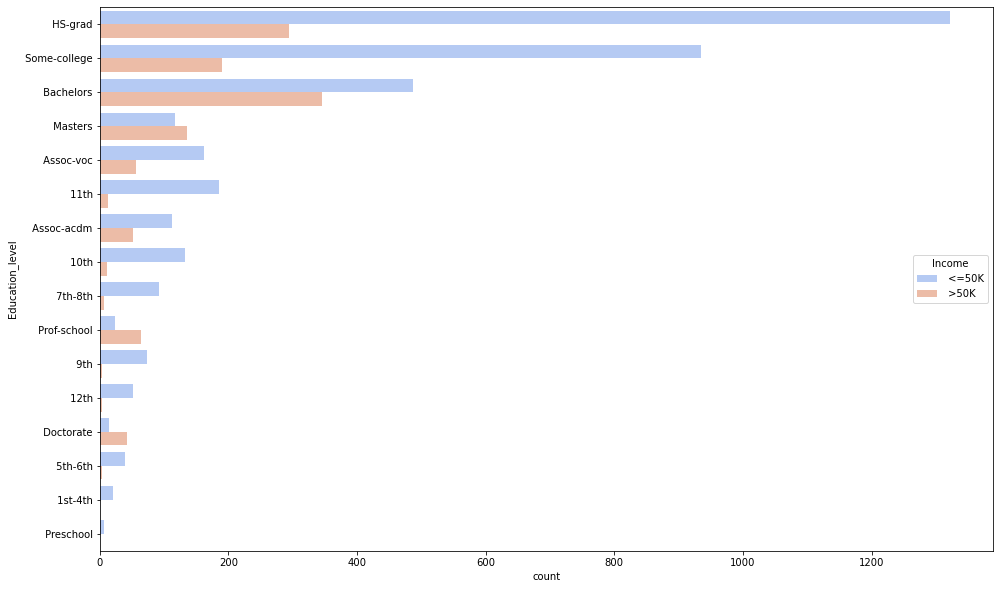

In [22]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="Education_level",hue="Income", data=df, palette="coolwarm",
              order=df.Education_level.value_counts().iloc[:].index)

- Stark Vertreten anhand der Ausbildung sind: Highschool level und College bzw. Bachelor 
- wohingegen am wenigsten Pre-school vertreten ist
- je höher der Bildungsgrad ist, desto mehr verdient man

# Schooling/trainings_period

<AxesSubplot:xlabel='Schooling/training_period', ylabel='Count'>

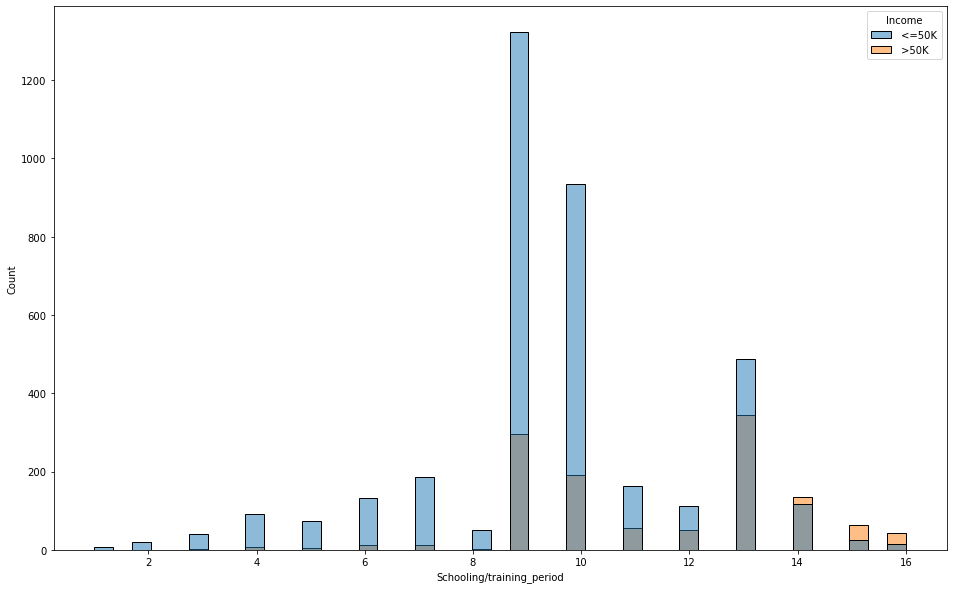

In [23]:
fig = plt.figure(figsize=(16,10))
sns.histplot(data=df, x="Schooling/training_period",hue="Income") 

- 9 Jahre ist am häufigste  vorhanden
- ab 14 Jahren sieht man, dass Leute die mehr studiert haben auch mehr verdienen

# Marital Status (Familienstand)

<AxesSubplot:ylabel='Marital_Status'>

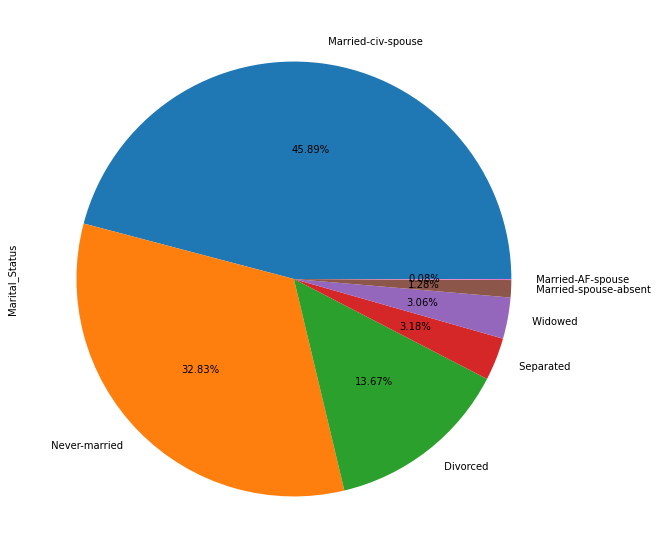

In [24]:
fig = plt.figure(figsize=(16,10))
df["Marital_Status"].value_counts().plot(kind='pie', autopct='%1.2f%%')

Am meisten vorhanden hier ist Married Civ spous und Never married

# Partnership

<AxesSubplot:xlabel='count', ylabel='Partnership'>

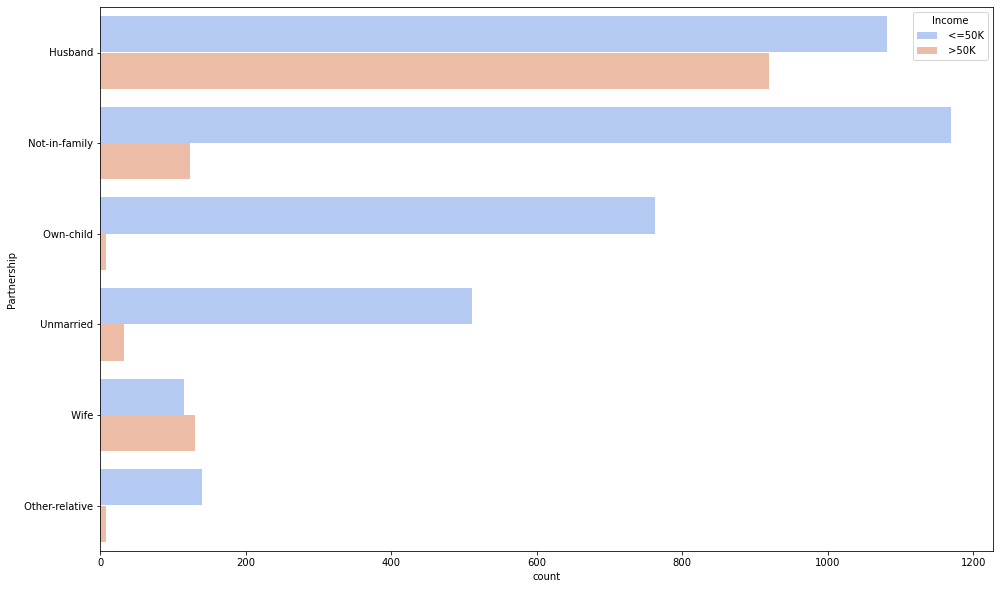

In [25]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="Partnership", data=df, hue="Income",palette="coolwarm",
              order=df.Partnership.value_counts().iloc[:].index)

Husband und Not in Family am häufigsten vorhanden

# Ethnicity

<AxesSubplot:ylabel='Ethnicity'>

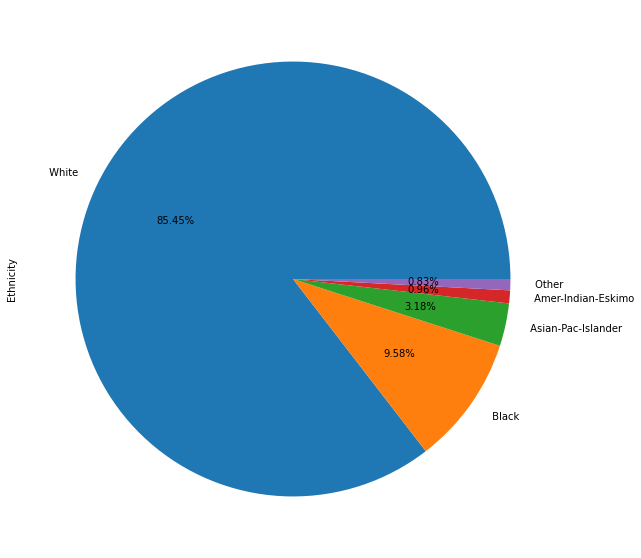

In [26]:
fig = plt.figure(figsize=(16,10))
df["Ethnicity"].value_counts().plot(kind='pie', autopct='%1.2f%%')

<AxesSubplot:xlabel='count', ylabel='Ethnicity'>

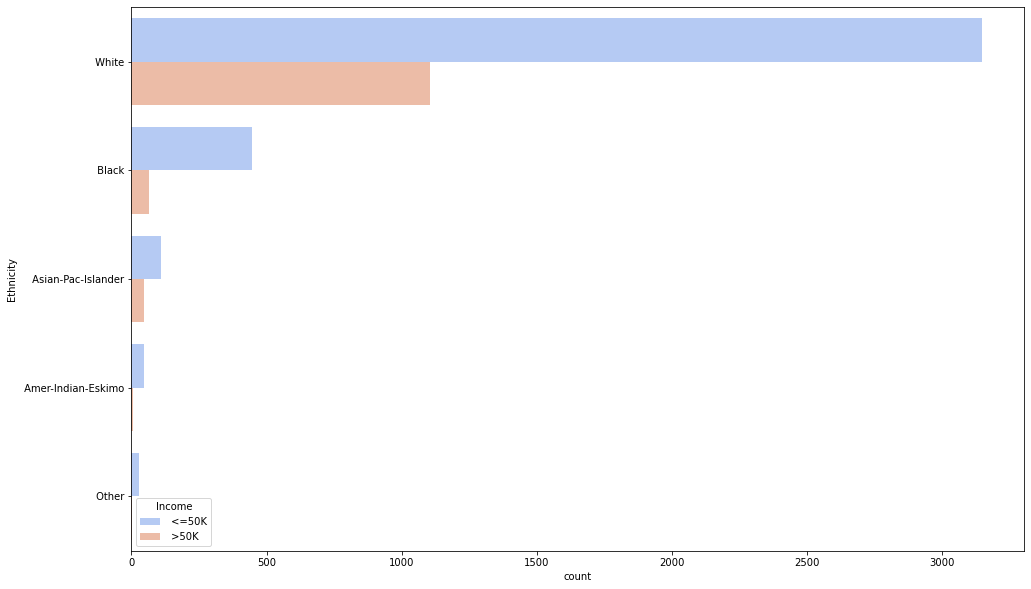

In [27]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
sns.countplot(y="Ethnicity", data=df, hue="Income",palette="coolwarm",
              order=df.Ethnicity.value_counts().iloc[:].index)

- Weiße sind am meisten vorhanden 
- das zweit häufigte mit nur 9 % sind Schwarze
- ähnlich auch bei der unterteilung durch Income

# Gains(Gewinn aus Vermögenswerten)

<AxesSubplot:xlabel='Gains', ylabel='Count'>

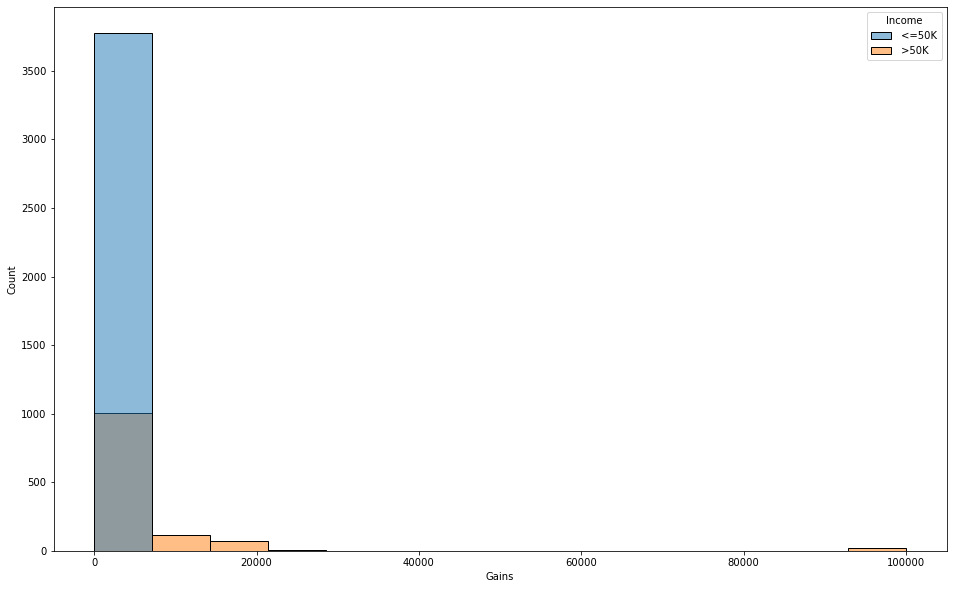

In [28]:
fig = plt.figure(figsize=(16,10))
sns.histplot(data=df, x="Gains",hue="Income") 

Je höher das Gehalt desto mehr Gewinnn durch Vermögenswert

# Losses(Verlust aus Vermögenswerten)

<AxesSubplot:xlabel='Losses', ylabel='Count'>

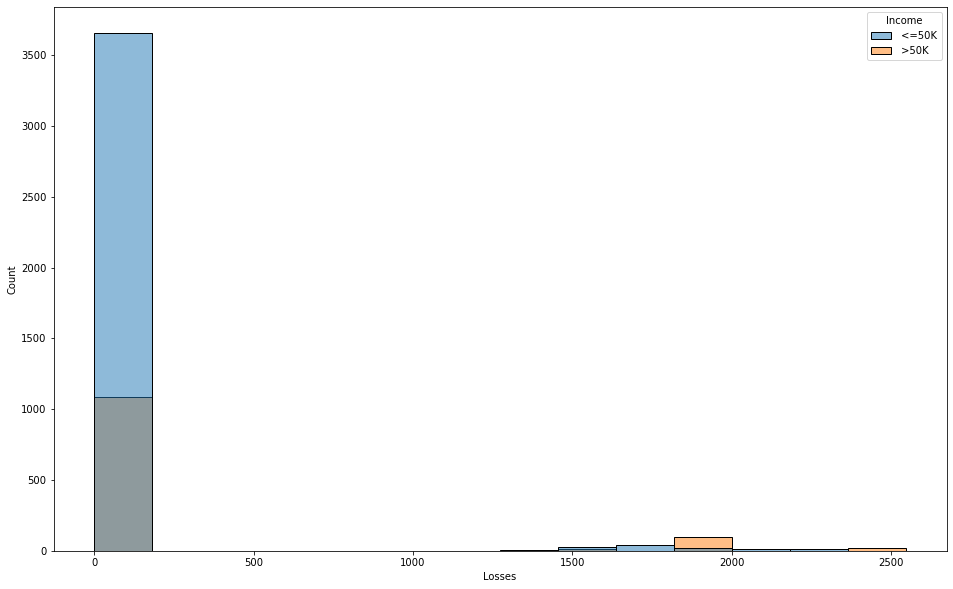

In [29]:
fig = plt.figure(figsize=(16,10))
sns.histplot(data=df, x="Losses",hue="Income") 

Ähnlich aufgebaut wie Gewinn

# Weekly working time

<AxesSubplot:xlabel='Weekly_working_time', ylabel='Count'>

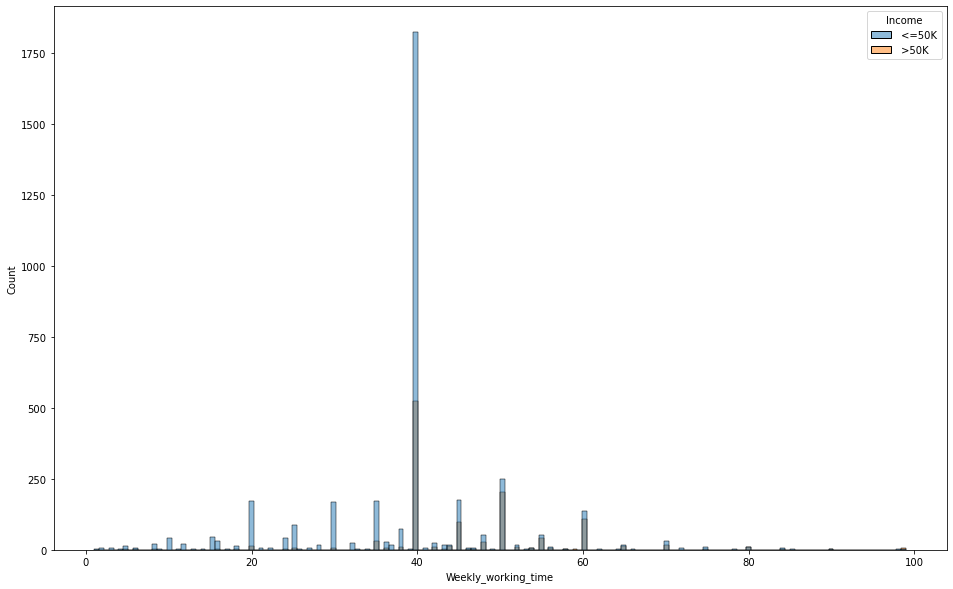

In [30]:
fig = plt.figure(figsize=(16,10))
sns.histplot(data=df, x="Weekly_working_time",hue="Income") 

Meisten Menschen arbeiten 40 Stunden die Woche egal ob sie mehr verdienen oder weniger

# Income

<AxesSubplot:xlabel='Income', ylabel='count'>

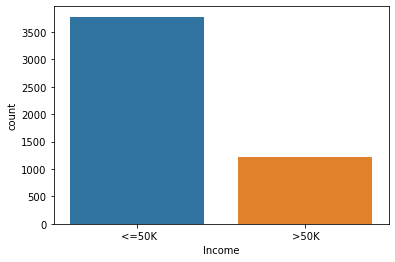

In [31]:
sns.countplot(x="Income",data=df)

Etwas 2/3 der Leuteverdienen weniger als 50 k und ein 1/3 davon verdienen mehr, also annähernd bis moderates Class Imbalance vorhanden (https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

# Duplicate analyse

In [32]:
df.duplicated().sum()

18

Man erkennt vom ganzen Datensatz gibt es 18 Duplicate welche redundant sind

# Anzahl der NA beim 5000 Trainingsdatensatz

In [33]:
df_5000.isnull().sum() 

Age                             0
Employment_type               331
Interview_dependent_weight      0
Education_level                 0
Schooling/training_period       0
Marital_Status                  0
Employment_area               331
Partnership                     0
Ethnicity                       0
Gender                          0
Gains                           0
Losses                          0
Weekly_working_time             0
Country                        97
Income                          0
dtype: int64

- Employment type hat 331 Samples wo Missing Values vorhanden sind
- Employment area hat 331 Samples wo Missing values vorhanden sind
- Country hat 97 Samples wo Missing values vorhanden sind

# Summary EDA für gesplittete Daten

Das gleiche wurde für die gesplitteten daten mit Income label bzw. ohne Income Label  gemacht 
- die Verteilungen sind bei beiden sehr ähnlich mit nur ein paar minimalen Wertebereich änderungen 